# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv');
powers_df = pd.read_csv('super_hero_powers.csv');
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [3]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df.drop(columns = ['Unnamed: 0'], axis = 0, inplace = True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
heroes_df.info()
heroes_df.isna().sum()
for column in heroes_df.columns.values:
    if heroes_df[column].nunique() < 100:
        print(heroes_df[column].value_counts())
    else:
        print('\nNumber of Unique Names: '+str(len(heroes_df[column].unique()))+'\n')
        
        
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB

Number of Unique Names: 715

Male      505
Female    200
-          29
Name: Gender, dtype: int64
blue                       225
-                          172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
yellow (without irises)      

There are 734 total entries. Of the columns that are numerical, only weight has missing values. There are two missing values in the weight column, so I'll choose to drop them.

Of the remaining columns, Publisher has 15 missing values. This is also a small enough number that they can be dropped.

Looking at the categorical data itself, it appears that each column deals with missing data in the following way and has (n) missing entries:
Gender: - (29)
Eye Color: - (172)
Race: - (304)
Hair Color: - (172)
Weight: -99 (217)
Height: -99 (217)
Skin Color: - (662)
Alignment: - (7)

There are only 715 unique names, which tells me that there is likely some non-unique name that is being used to describe an "unknown" name. I'll hunt for that after I clean up the data.

Now I'll look at the second dataset using the same methods

In [6]:
powers_df.info(verbose = True)
powers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 168 columns):
hero_names                      object
Agility                         bool
Accelerated Healing             bool
Lantern Power Ring              bool
Dimensional Awareness           bool
Cold Resistance                 bool
Durability                      bool
Stealth                         bool
Energy Absorption               bool
Flight                          bool
Danger Sense                    bool
Underwater breathing            bool
Marksmanship                    bool
Weapons Master                  bool
Power Augmentation              bool
Animal Attributes               bool
Longevity                       bool
Intelligence                    bool
Super Strength                  bool
Cryokinesis                     bool
Telepathy                       bool
Energy Armor                    bool
Energy Blasts                   bool
Duplication                     bool
Size

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wallcrawling             0
V

The powers dataset only holds boolean values, and it appears that every column is filled in for every superhero.
There are 667 entries. I'll see if there are any names that are repeated.

In [7]:
powers_df.nunique().head()

hero_names               667
Agility                    2
Accelerated Healing        2
Lantern Power Ring         2
Dimensional Awareness      2
dtype: int64

It looks like there are no repeated names in this list. I'll check the other list quickly:

In [8]:
heroes_df.name.value_counts()

Spider-Man           3
Goliath              3
Black Canary         2
Blue Beetle          2
Toxin                2
Batman               2
Captain Marvel       2
Nova                 2
Namor                2
Firestorm            2
Batgirl              2
Atlas                2
Speedy               2
Blizzard             2
Angel                2
Vindicator           2
Atom                 2
Hawk                 1
Curse                1
Han Solo             1
Spider-Carnage       1
Lightning Lad        1
Franklin Storm       1
Cogliostro           1
Bloodaxe             1
Professor Zoom       1
Cyclops              1
Colossal Boy         1
Longshot             1
Agent 13             1
                    ..
Warlock              1
Monarch              1
Martian Manhunter    1
Kyle Rayner          1
Jack-Jack            1
Wiz Kid              1
Living Tribunal      1
Siren                1
One Punch Man        1
James Bond           1
Jean Grey            1
Quantum              1
Hercules   

There are a few superhero names that are repeated, and there isn't a placeholder used for a superhero without a name.

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




The powers dataset doesn't need to be cleaned, in fact it can likely be used as the dataset from which to perform a left-join later (given that it has unique superhero names).
The hero dataset does need to be cleaned up. I'll remove rows with missing values (Weight and Publisher) since it's a small number (17). Given that each row represents a superhero, I can't assign a value to rows with missing data (who's to say that a given superhero even has eyes?). In this case, the best thing to do may be to leave those placeholders alone to use later when the data gets grouped.
The only series that give me pause are the weight and height series, which will end up with odd data if it's plotted. I'll replace the values equal to -99 with their median instead once I've looked at repeated superhero names to determine what to do.

In [9]:
heroes_df.dropna(inplace = True)
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [10]:
heroes_df.info()
heroes_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 733
Data columns (total 10 columns):
name          719 non-null object
Gender        719 non-null object
Eye color     719 non-null object
Race          719 non-null object
Hair color    719 non-null object
Height        719 non-null float64
Publisher     719 non-null object
Skin color    719 non-null object
Alignment     719 non-null object
Weight        719 non-null float64
dtypes: float64(2), object(8)
memory usage: 61.8+ KB


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


My only remaining concern is what to do with heroes who share the same name. If I set the index as the superhero name, which I intend to do to join the datasets, then I'll have to contend with multiple entries for spider-man, etc. It might be good to look at those entries to compare...

In [11]:
name_counts = heroes_df.name.value_counts()
unique_names = name_counts[name_counts > 1].index.tolist()
heroes_df.loc[heroes_df.name.isin(unique_names)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,-,good,101.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
49,Atom,Male,blue,-,Red,178.0,DC Comics,-,good,68.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
62,Batgirl,Female,-,-,-,-99.0,DC Comics,-,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,-,good,57.0
68,Batman,Male,blue,Human,black,188.0,DC Comics,-,good,95.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0


Some of these rows can be collapsed into a single row, some rows are superceded, and some rows have to be erased entirely since it's impossible to tell which one has the "correct" data.

I'll drop superceded rows first:

In [12]:
heroes_df.drop([50, 62, 115,123,259,289,290,481,617,623,696],inplace = True)

In [13]:
name_counts = heroes_df.name.value_counts()
unique_names = name_counts[name_counts > 1].index.tolist()
heroes_df.loc[heroes_df.name.isin(unique_names)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,-,good,101.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
68,Batman,Male,blue,Human,black,188.0,DC Comics,-,good,95.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0
96,Black Canary,Female,blue,Human,Blond,165.0,DC Comics,-,good,58.0
97,Black Canary,Female,blue,Metahuman,Blond,170.0,DC Comics,-,good,59.0
155,Captain Marvel,Female,blue,Human-Kree,Blond,180.0,Marvel Comics,-,good,74.0
156,Captain Marvel,Male,blue,Human,Black,193.0,DC Comics,-,good,101.0


Now I'll remove entries that can't be resolved because of many inconsistencies. Where there is an inconsistency that can be resolved (e.g. eye color hazel vs brown), then I'll choose the row that has values more likely to be found in the dataset elsewhere.

In [14]:
heroes_df.drop([47,48,69,97,155,496,497,624,673],inplace = True)

In [15]:
name_counts = heroes_df.name.value_counts()
unique_names = name_counts[name_counts > 1].index.tolist()
heroes_df.loc[heroes_df.name.isin(unique_names)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0


And finally we have one row to merge:

In [16]:
heroes_df.iloc[22,3] = 'Vampire'
heroes_df.drop(23,inplace = True)

Now I'll fix the weights and heights of those missing values to be the median

In [17]:
heroes_df.loc[heroes_df.Weight == -99, 'Weight'] = heroes_df.Weight.median()
heroes_df.loc[heroes_df.Height == -99, 'Height'] = heroes_df.Height.median()

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

The two dataframes will be joined using the 'inner' type. The idea here is that we only keep the data for heroes that have both powers and characteristics. If this join ends up being too small, then I'll perform a left join.

In [18]:
heroes_df.set_index('name',inplace=True)

In [19]:
powers_df.set_index('hero_names',inplace=True)

In [20]:
joined_df = powers_df.join(heroes_df, how = 'inner')
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, A-Bomb to Zoom
Columns: 176 entries, Agility to Weight
dtypes: bool(167), float64(2), object(7)
memory usage: 151.5+ KB


Alright! It looks like we kept 628 entries out of a possible 667. That's pretty great, so we'll work with this dataset now.

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

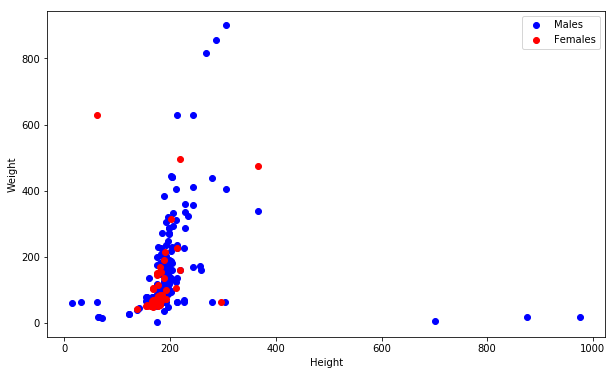

In [21]:
grouped = joined_df.groupby(by = 'Gender')
males = grouped.get_group('Male')
females = grouped.get_group('Female')
fig1 = plt.figure(figsize = (10,6))

plt.scatter(males.Height,males.Weight, c='blue');
plt.scatter(females.Height,females.Weight,c='red');
plt.xlabel('Height');
plt.ylabel('Weight');
plt.legend(['Males', 'Females']);

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [22]:
# The Grouped engine has already grouped the dataframes by gender.
# I'll call it here instead of calling individual dataframes, which
# would be silly to do since you then call 'gender' in the function

def show_distplot(dataframe, gender, column_name):
    # Ideally we would check our inputs, but this is a controlled environment
    sns.distplot(dataframe.get_group(gender)[column_name].values)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


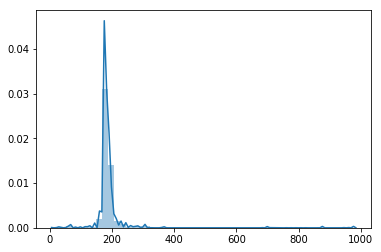

In [23]:
# Male Height
show_distplot(grouped,'Male','Height')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


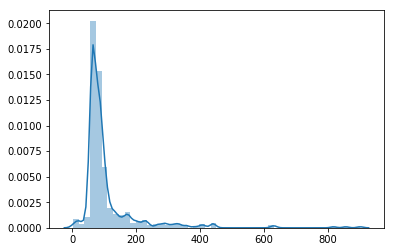

In [24]:
# Male Weight
show_distplot(grouped,'Male','Weight')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


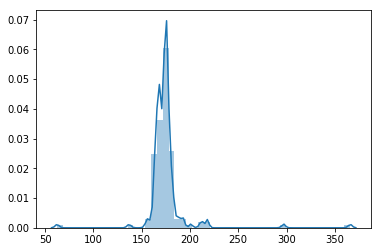

In [25]:
# Female Height
show_distplot(grouped,'Female','Height')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


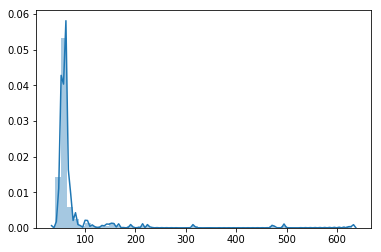

In [26]:
# Female Weight
show_distplot(grouped,'Female','Weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________

All of these graphs are skewed to the right, which means that in general superheros are larger than smaller.
Female weight is significantly lower than male weight in all statistical measures, as is their height.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [27]:
joined_df.sum(numeric_only = True).sort_values(ascending = False).head(7)

Height            116061.0
Weight             63067.0
Super Strength       343.0
Stamina              271.0
Durability           243.0
Super Speed          236.0
Agility              226.0
dtype: float64

The top five powers overall, in order from most frequent to least, are Super Strength, Stamina, Durability, Super Speed, and Agility

In [28]:
joined_df.loc[joined_df.Publisher == 'Marvel Comics'].sum(numeric_only = True).sort_values(ascending = False).head(7)

Height            62879.5
Weight            37487.0
Super Strength      196.0
Durability          145.0
Stamina             142.0
Super Speed         129.0
Agility             119.0
dtype: float64

The tope five powers overall for the Marvel Universe are Super Strength, Durability, Stamina, Super Speed, and Agility.

In [29]:
joined_df.loc[joined_df.Publisher == 'DC Comics'].sum(numeric_only = True).sort_values(ascending = False).head(7)

Height            33731.5
Weight            17464.0
Super Strength      104.0
Flight               84.0
Stamina              84.0
Super Speed          76.0
Agility              69.0
dtype: float64

The tope five powers overall for the DC Universe are Super Strength, Flight, Stamina, Super Speed, and Agility.

Interestingly, Flight does not show up on the Marvel list or the overall list. DC comics favored superheroes that could fly, whereas Marvel did not. I don't know the universes well enough, but perhaps DC superheroes are more often beings from another planet/location, whereas Marvel are humans that have been changed? 

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

* Above I asked a question about whether or not there were differences between the two universes regarding the origin of the superhero. I posited that hypothesis based on the number of superheros that could fly, but really it breaks down to whether or not a superhero is/was considered a human. I'll investigate the following:

* Is there a difference in the number of superheros that are/were humans between the two largest publishers, and are superheros that are classified as 'human' less likely to fly?

Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [30]:
joined_df.Race.value_counts()

-                     234
Human                 186
Mutant                 60
God / Eternal          13
Human / Radiation      11
Cyborg                 10
Android                 9
Kryptonian              7
Alien                   7
Symbiote                7
Demon                   6
Alpha                   5
Asgardian               5
Atlantean               5
Inhuman                 4
Cosmic Entity           4
Human / Altered         3
New God                 3
Eternal                 2
Frost Giant             2
Amazon                  2
Vampire                 2
Demi-God                2
Animal                  2
Saiyan                  2
Yautja                  1
Zombie                  1
Tamaranean              1
Bizarro                 1
Human / Cosmic          1
Dathomirian Zabrak      1
Icthyo Sapien           1
Rodian                  1
Bolovaxian              1
Martian                 1
Zen-Whoberian           1
Human-Vuldarian         1
Strontian               1
Yoda's speci

The majority of superheros are directly classified as humans. Additionally, there are some superheros who either were humans or are a mix of a human and another race. For the purpose of this investigation, I'll consider a superhero a human if the superhero was at any point completely human. Lucky for me, the dataset makes this distinction with a symbol. If the name of the race contains human AND a "/", then the superhero was at one point a full human. If it contains human AND a "-" then the superhero is a cross of breeds. 

I'll make a new column that indicates whether the hero was ever a full human, and then I'll use that column to make two groups.

In [31]:
joined_df['Initially_Human'] = (
    joined_df.Race.str.contains('Human .*')) | (
    joined_df.Race.str.match('Human'))
joined_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Initially_Human
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,True
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,True
Abraxas,False,False,False,True,False,False,False,False,True,False,...,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,-,bad,63.0,False


In [32]:
grouped = joined_df.groupby('Initially_Human')
human_df = grouped.get_group(True)
nonhuman_df = grouped.get_group(False)
human_df.info()
nonhuman_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, A-Bomb to Zatanna
Columns: 177 entries, Agility to Initially_Human
dtypes: bool(168), float64(2), object(7)
memory usage: 49.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 422 entries, Abe Sapien to Zoom
Columns: 177 entries, Agility to Initially_Human
dtypes: bool(168), float64(2), object(7)
memory usage: 102.2+ KB


In [33]:
human_df.loc[human_df.Publisher.isin(['Marvel Comics', 'DC Comics'])].Publisher.value_counts()

Marvel Comics    90
DC Comics        87
Name: Publisher, dtype: int64

In [34]:
nonhuman_df.loc[nonhuman_df.Publisher.isin(['Marvel Comics', 'DC Comics'])].Publisher.value_counts()

Marvel Comics    241
DC Comics        101
Name: Publisher, dtype: int64

My prediction was correct. Marvel comics prefers superheros that are not human, whereas DC comics doesn't particularly care either way. 

Now I'll look to see if humans fly less often than non-humans. I'll make a new group that sorts by initially human AND publisher, then get the counts in each set. I can then look at the number of individuals that fly in each set.

In [35]:
joined_df.groupby(['Initially_Human', 'Publisher'])['Flight'].sum().loc[(slice(None) , ['DC Comics', 'Marvel Comics'])]

Initially_Human  Publisher    
False            DC Comics        52.0
                 Marvel Comics    84.0
True             DC Comics        32.0
                 Marvel Comics    22.0
Name: Flight, dtype: float64

In both universes there are fewer humans who fly, but the fraction of humans with flight is much lower in the Marvel universe (~20%) when compared to the DC universe (~38%).

This is all well and good, but I haven't really looked at any data thus far. Given that the data is mainly stored as boolean values, I'm going to compare the distributions of the total number of superpowers for superheroes between the two largest publishers. I hypothesize that the average number of powers is the same, but given that Marvel Comics prefers non-human superheroes this may not be true. I'll look at the descriptive analysis first, and then I'll plot histograms.

I'll make a new column that sums the number of powers.

In [42]:
joined_df['Num_Powers'] = joined_df.select_dtypes(include = bool).sum(axis = 1)-1 # Subtract one since there's a boolean column indicated initial human status
joined_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Initially_Human,Num_Powers
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,True,7
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,False,15
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,0
Abomination,False,True,False,False,False,False,False,False,False,False,...,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,True,8
Abraxas,False,False,False,True,False,False,False,False,True,False,...,blue,Cosmic Entity,Black,175.0,Marvel Comics,-,bad,63.0,False,13


There are some superheros that don't have any powers! I'll find a count of them quickly for fun:

In [47]:
joined_df.loc[joined_df.Num_Powers == 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Abin Sur to Vertigo II
Columns: 178 entries, Agility to Num_Powers
dtypes: bool(168), float64(2), int64(1), object(7)
memory usage: 13.8+ KB


There's a total of 55 superheros without powers. Imagine that. I wonder what it takes to be a superhero?

But I digress. Let's return to the main topic at hand, which is determining the distribution of number of powers. Let's look at the whole dataset first.

In [89]:
#joined_df.loc[joined_df.Publisher.isin(['DC Comics', 'Marvel Comics'])].hist(column = 'Num_Powers', by = 'Publisher');
grouped = joined_df.groupby('Publisher');
grouped.agg(['mean', 'median', 'max', 'min', 'std'])['Num_Powers'].loc[['DC Comics', 'Marvel Comics']]

,mean,median,max,min,std
Publisher,,,,,
DC Comics,9.335106,8.0,48,0,8.224747
Marvel Comics,8.000000,7.0,34,0,6.505476


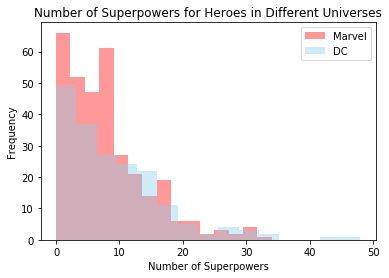

In [85]:
DC_df = grouped.get_group('DC Comics');
Marvel_df = grouped.get_group('Marvel Comics');
Marvel_powers_data = Marvel_df.Num_Powers.tolist();
DC_powers_data = DC_df.Num_Powers.tolist();
sns.distplot(Marvel_powers_data,color="red", label="Marvel", kde = False, bins = 15 )
sns.distplot(DC_powers_data,color="skyblue", label="DC", kde = False, bins = 15 )
plt.legend()
plt.title('Number of Superpowers for Heroes in Different Universes')
plt.xlabel('Number of Superpowers')
plt.ylabel('Frequency')
plt.show()

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data